In [2]:
import zarr
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
# jsonの読み込み

import json

path_ = "../inputs/train/overlay/ExperimentRuns/TS_5_4/Picks/apo-ferritin.json"

with open(path_, "r") as f:
    data = json.load(f)

data  # ['points']

{'pickable_object_name': 'apo-ferritin',
 'user_id': 'curation',
 'session_id': '0',
 'run_name': 'TS_5_4',
 'voxel_spacing': None,
 'unit': 'angstrom',
 'points': [{'location': {'x': 468.514, 'y': 5915.906, 'z': 604.167},
   'transformation_': [[1.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]],
   'instance_id': 0},
  {'location': {'x': 5674.694, 'y': 1114.354, 'z': 565.068},
   'transformation_': [[1.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]],
   'instance_id': 0},
  {'location': {'x': 5744.509, 'y': 1049.172, 'z': 653.712},
   'transformation_': [[1.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]],
   'instance_id': 0},
  {'location': {'x': 5880.769, 'y': 1125.348, 'z': 579.56},
   'transformation_': [[1.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]],
   'instance_id': 0},
  {'locatio

In [4]:
data["points"]

[{'location': {'x': 468.514, 'y': 5915.906, 'z': 604.167},
  'transformation_': [[1.0, 0.0, 0.0, 0.0],
   [0.0, 1.0, 0.0, 0.0],
   [0.0, 0.0, 1.0, 0.0],
   [0.0, 0.0, 0.0, 1.0]],
  'instance_id': 0},
 {'location': {'x': 5674.694, 'y': 1114.354, 'z': 565.068},
  'transformation_': [[1.0, 0.0, 0.0, 0.0],
   [0.0, 1.0, 0.0, 0.0],
   [0.0, 0.0, 1.0, 0.0],
   [0.0, 0.0, 0.0, 1.0]],
  'instance_id': 0},
 {'location': {'x': 5744.509, 'y': 1049.172, 'z': 653.712},
  'transformation_': [[1.0, 0.0, 0.0, 0.0],
   [0.0, 1.0, 0.0, 0.0],
   [0.0, 0.0, 1.0, 0.0],
   [0.0, 0.0, 0.0, 1.0]],
  'instance_id': 0},
 {'location': {'x': 5880.769, 'y': 1125.348, 'z': 579.56},
  'transformation_': [[1.0, 0.0, 0.0, 0.0],
   [0.0, 1.0, 0.0, 0.0],
   [0.0, 0.0, 1.0, 0.0],
   [0.0, 0.0, 0.0, 1.0]],
  'instance_id': 0},
 {'location': {'x': 4661.667, 'y': 1269.497, 'z': 810.409},
  'transformation_': [[1.0, 0.0, 0.0, 0.0],
   [0.0, 1.0, 0.0, 0.0],
   [0.0, 0.0, 1.0, 0.0],
   [0.0, 0.0, 0.0, 1.0]],
  'instance_id': 0

In [5]:
particles_name = [
    "apo-ferritin",
    "beta-amylase",
    "beta-galactosidase",
    "ribosome",
    "thyroglobulin",
    "virus-like-particle",
]

In [6]:
# 指定ディレクトリから再帰的に.Identifierファイルをを削除するコード
import os

dir_ = "../"


def remove_identifier(dir_):
    for root, dirs, files in os.walk(dir_):
        for file in files:
            if ".Identifier" in file:
                os.remove(os.path.join(root, file))


# remove_identifier(dir_)

In [7]:
# データの読み込み

zarr_pth = "../inputs/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/ctfdeconvolved.zarr"

zarr_store = zarr.open(zarr_pth, mode="r")

In [17]:
zarr_store["0"][:].shape, zarr_store["1"][:].shape, zarr_store["2"][:].shape

((184, 630, 630), (92, 315, 315), (46, 158, 158))

In [8]:
tomogram = zarr_store["0"][:]

print(f"Tomogram shape: {tomogram.shape}")
print(f"Data type: {tomogram.dtype}")
print(f"Min value: {tomogram.min()}")
print(f"Max value: {tomogram.max()}")
print(f"Mean value: {tomogram.mean()}")

Tomogram shape: (184, 630, 630)
Data type: float32
Min value: -0.0008865185081958771
Max value: 0.0008514923974871635
Mean value: 2.9023530601079983e-07


In [9]:
def read_zarr(zarr_pth, resolution="0"):
    zarr_store = zarr.open(zarr_pth, mode="r")

    tomogram = zarr_store[resolution][:]

    return tomogram


def read_info_json(
    base_dir="../inputs/train/overlay/ExperimentRuns/",
    exp_name="TS_5_4",
    particle_name="apo-ferritin",
):

    keys = set(
        [
            "apo-ferritin",
            "beta-amylase",
            "beta-galactosidase",
            "ribosome",
            "thyroglobulin",
            "virus-like-particle",
        ]
    )

    if particle_name not in keys:
        raise ValueError(
            f"Particle name should be one of the following: {keys}. Got {particle_name}."
        )

    read_json_path = os.path.join(base_dir, exp_name, "Picks", f"{particle_name}.json")

    with open(read_json_path, "r") as f:
        particle_info = json.load(f)

    coords = []
    for point in particle_info["points"]:
        coords.append(
            [point["location"]["z"], point["location"]["y"], point["location"]["x"]]
        )

    coords = np.array(coords)

    return coords


def scale_coordinates(coords, tomogram_shape):
    """Scale coordinates to match tomogram dimensions."""
    scaled_coords = coords.copy()

    scaled_coords[:, 0] = coords[:, 0] / coords[:, 0].max() * tomogram_shape[0]
    scaled_coords[:, 1] = coords[:, 1] / coords[:, 1].max() * tomogram_shape[1]
    scaled_coords[:, 2] = coords[:, 2] / coords[:, 2].max() * tomogram_shape[2]

    return scaled_coords


def create_dataset(
    zarr_pth,
    base_dir="../inputs/train/overlay/ExperimentRuns/",
    exp_name="TS_5_4",
    resolution="0",
    particle_names=[],
):
    tomogram = read_zarr(zarr_pth, resolution=resolution)

    particle_info = {"corrds": {}, "scaled_corrds": {}}
    for particle_name in particle_names:
        coords = read_info_json(base_dir, exp_name, particle_name)
        scaled_coords = scale_coordinates(coords, tomogram.shape)
        particle_info["corrds"][particle_name] = coords
        particle_info["scaled_corrds"][particle_name] = scaled_coords

    return tomogram, particle_info

In [10]:
res = {}

for particle in particles_name:
    res[particle] = read_info_json(particle_name=particle)

In [11]:
tomogram, particle_info = create_dataset(
    zarr_pth=zarr_pth, particle_names=particles_name, resolution="2"
)

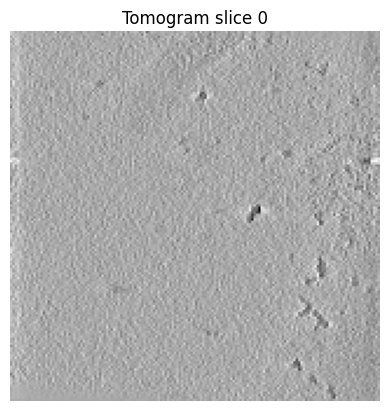

In [14]:
# tomogramの0番目の値を画像として保存

tomogram_0 = tomogram[0]

plt.imshow(tomogram_0, cmap="gray")
plt.axis("off")
plt.title("Tomogram slice 0")
# plt.show()

plt.savefig("tomogram_0.png")

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(tomogram[0, :, :], cmap="gray")

plt.scatter()

NameError: name 'tomogram' is not defined

apo-ferritin
beta-amylase
beta-galactosidase
ribosome
thyroglobulin
virus-like-particle


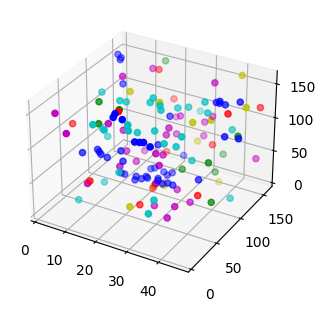

In [46]:
fig = plt.figure(figsize=(18, 8))
# ax = fig.add_subplot(2, 3, p.label, projection="3d")
import matplotlib

color_list = list(matplotlib.colors.CSS4_COLORS.keys())
color2color = matplotlib.colors.CSS4_COLORS

color_list = ["b", "g", "r", "c", "m", "y", "k"]

ax = fig.add_subplot(2, 3, len(particles_name), projection="3d")

for i, particle in enumerate(particles_name):
    ax.scatter(
        particle_info["scaled_corrds"][particle][:, 0],
        particle_info["scaled_corrds"][particle][:, 1],
        particle_info["scaled_corrds"][particle][:, 2],
        # alpha=0.25,
        # color=color2color[color_list[i]],
        color=color_list[i],
        label=particle,
    )
    print(particle)